In [1]:
import pandas as pd

Vamos a trabajar con un DataSet de records de gente que ha comprado iphones, Vamos a hacer un clasificador que tome en cuenta los atributos de género, edad, y salario de las personas para definir si compra o no el producto. Vamos a realizar este análisis comparando varios algoritmos

Haremos el análisis con:

* Logistic Regression
* KNN
* Kernel SVM
* Naive Bayes
* Decision Tree
* Random Forest

In [3]:
#Comenzamos cargando los datos 
df = pd.read_csv("iphone_purchase_records.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [5]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
#Para hacer más fácil para que la computadora interprete los datos cambiamos a número el género 
di={'Male':0,'Female':1}
df=df.replace({"Gender": di})
df=df.rename(columns={'Purchase Iphone':'Target'})

In [7]:
#vemos un poco mas de la data
df.head()

,Gender,Age,Salary,Target
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [8]:
df.shape

(400, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  400 non-null    int64
 1   Age     400 non-null    int64
 2   Salary  400 non-null    int64
 3   Target  400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [9]:
# Separamos el data set en los features independientes y dependientes 
X = df.drop(columns=['Target'])
y = df.Target

In [10]:
X

,Gender,Age,Salary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


Ahora haremos un siguiente paso que se llama "Feature Scaling"

El escalado de características es una técnica para normalizar las características independientes presentes en los datos en un rango fijo. Se realiza durante el preprocesamiento de los datos para manejar magnitudes o valores o unidades muy variables. Si no se realiza el escalado de características, un algoritmo de aprendizaje automático tiende a ponderar los valores más grandes, más altos y a considerar los valores más pequeños como los más bajos, independientemente de la unidad de los valores.


![Feature Scaling](https://editor.analyticsvidhya.com/uploads/41951FEATURE%20SCALING%20IN%20PYTHON.png)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

Ahora sí, procedemos a analizar con los diferentes algoritmos

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

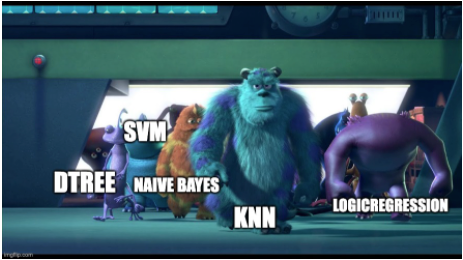

#[Regresión Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [13]:
cm=('Logistic Regression', LogisticRegression(solver="liblinear"))
kfold = KFold(n_splits=10, random_state=7)
print(kfold)
result = cross_val_score(cm[1], X, y, cv=kfold, scoring='accuracy')
print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (cm[0], result.mean()*100, result.std()*100))


KFold(n_splits=10, random_state=7, shuffle=False)
Logistic Regression: Mean Accuracy = 82.75% - SD Accuracy = 11.37%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#[K Nearest](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [14]:
cm=('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2))
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(cm[1], X, y, cv=kfold, scoring='accuracy')
print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (cm[0], result.mean()*100, result.std()*100))


K Nearest Neighbor: Mean Accuracy = 90.50% - SD Accuracy = 7.73%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#[SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [15]:
cm=('Kernel SVM', SVC(kernel = 'rbf',gamma='scale'))
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(cm[1], X, y, cv=kfold, scoring='accuracy')
print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (cm[0], result.mean()*100, result.std()*100))



Kernel SVM: Mean Accuracy = 90.75% - SD Accuracy = 9.15%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#[Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [16]:
cm=('Naive Bayes', GaussianNB())
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(cm[1], X, y, cv=kfold, scoring='accuracy')
print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (cm[0], result.mean()*100, result.std()*100))


Naive Bayes: Mean Accuracy = 85.25% - SD Accuracy = 10.34%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#[Árbol de decisión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [18]:
cm=('Decision Tree', DecisionTreeClassifier(criterion = "entropy"))
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(cm[1], X, y, cv=kfold, scoring='accuracy')
print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (cm[0], result.mean()*100, result.std()*100))


Decision Tree: Mean Accuracy = 85.00% - SD Accuracy = 7.98%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [19]:
cm=('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy"))
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(cm[1], X, y, cv=kfold, scoring='accuracy')
print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (cm[0], result.mean()*100, result.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest: Mean Accuracy = 88.00% - SD Accuracy = 9.27%


Vimos que K nearest tiene un muy buen desempeño así que entrenemos a nuestro modelo con este algoritmo

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape

(300, 3)

In [24]:

from sklearn.neighbors import KNeighborsClassifier
# metric = minkowski and p=2 is Euclidean Distance
classifier = KNeighborsClassifier(n_neighbors=17, metric="minkowski",p=2)
classifier.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [26]:
# Step 5 - Make Prediction
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [27]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
print(cm)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

[[64  4]
 [ 3 29]]
Accuracy Score : 0.93
Precision Score : 0.8787878787878788
Recall Score : 0.90625
F1 Score : 0.8923076923076922


Ahora te toca a ti!

https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival